# Movement Distribution Map

Created by Alexander Nez

Data: July 2nd, 2024

Last update: July 2nd, 2024


# Neccesary Python Packages


In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.gridspec as gridspec

# Cleaning Movement DIstribution Map


In [55]:
dir = '/Users/alexandernez/Desktop/Github/Epymorph_vignettes/scratch/Data_for_good/movement-distribution'
month = 'May_2024'

Movement_month = os.path.join(dir, month)

files = os.listdir(Movement_month)

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(Movement_month, file)
        
        data = pd.read_csv(file_path)
        
        filtered_data = data[data['country'] == 'USA']
        
        date_part = file.split('_')[-1]
        
        new_filename = os.path.join(Movement_month, date_part)
        filtered_data.to_csv(new_filename, index=False)
        
        os.remove(file_path)

# Selecting Data Range


In [51]:
County = ' Maricopa'

start_date = datetime.strptime('2023-02-01', '%Y-%m-%d')
end_date = datetime.strptime('2023-04-02', '%Y-%m-%d')

required_categories = ['0', '(0, 10)', '[10, 100)', '100+']

def read_and_filter_data(file_path, county_name):
    data = pd.read_csv(file_path)
    return data[data['gadm_name'] == county_name]

all_data = pd.DataFrame()

current_date = start_date
while current_date <= end_date:
    month_folder = current_date.strftime('%B_%Y')
    day_file = f"{current_date.strftime('%Y-%m-%d')}.csv"
    
    file_path = os.path.join(dir, month_folder, day_file)
    
    if os.path.exists(file_path):
        daily_data = read_and_filter_data(file_path, 'Maricopa')
        all_data = pd.concat([all_data, daily_data])
    
    current_date += timedelta(days=1)

grouped_data = all_data.groupby(['ds', 'home_to_ping_distance_category'])['distance_category_ping_fraction'].mean().reset_index()
pivot_data = grouped_data.pivot(index='ds', columns='home_to_ping_distance_category', values='distance_category_ping_fraction').reset_index()

for category in required_categories:
    if category not in pivot_data.columns:
        pivot_data[category] = 0

pivot_data = pivot_data[['ds'] + required_categories]

pivot_data.to_csv(os.path.join(dir, f'{County}_{start_date}_{end_date}_movement_data.csv'), index=False)

# Plotting Movement Data


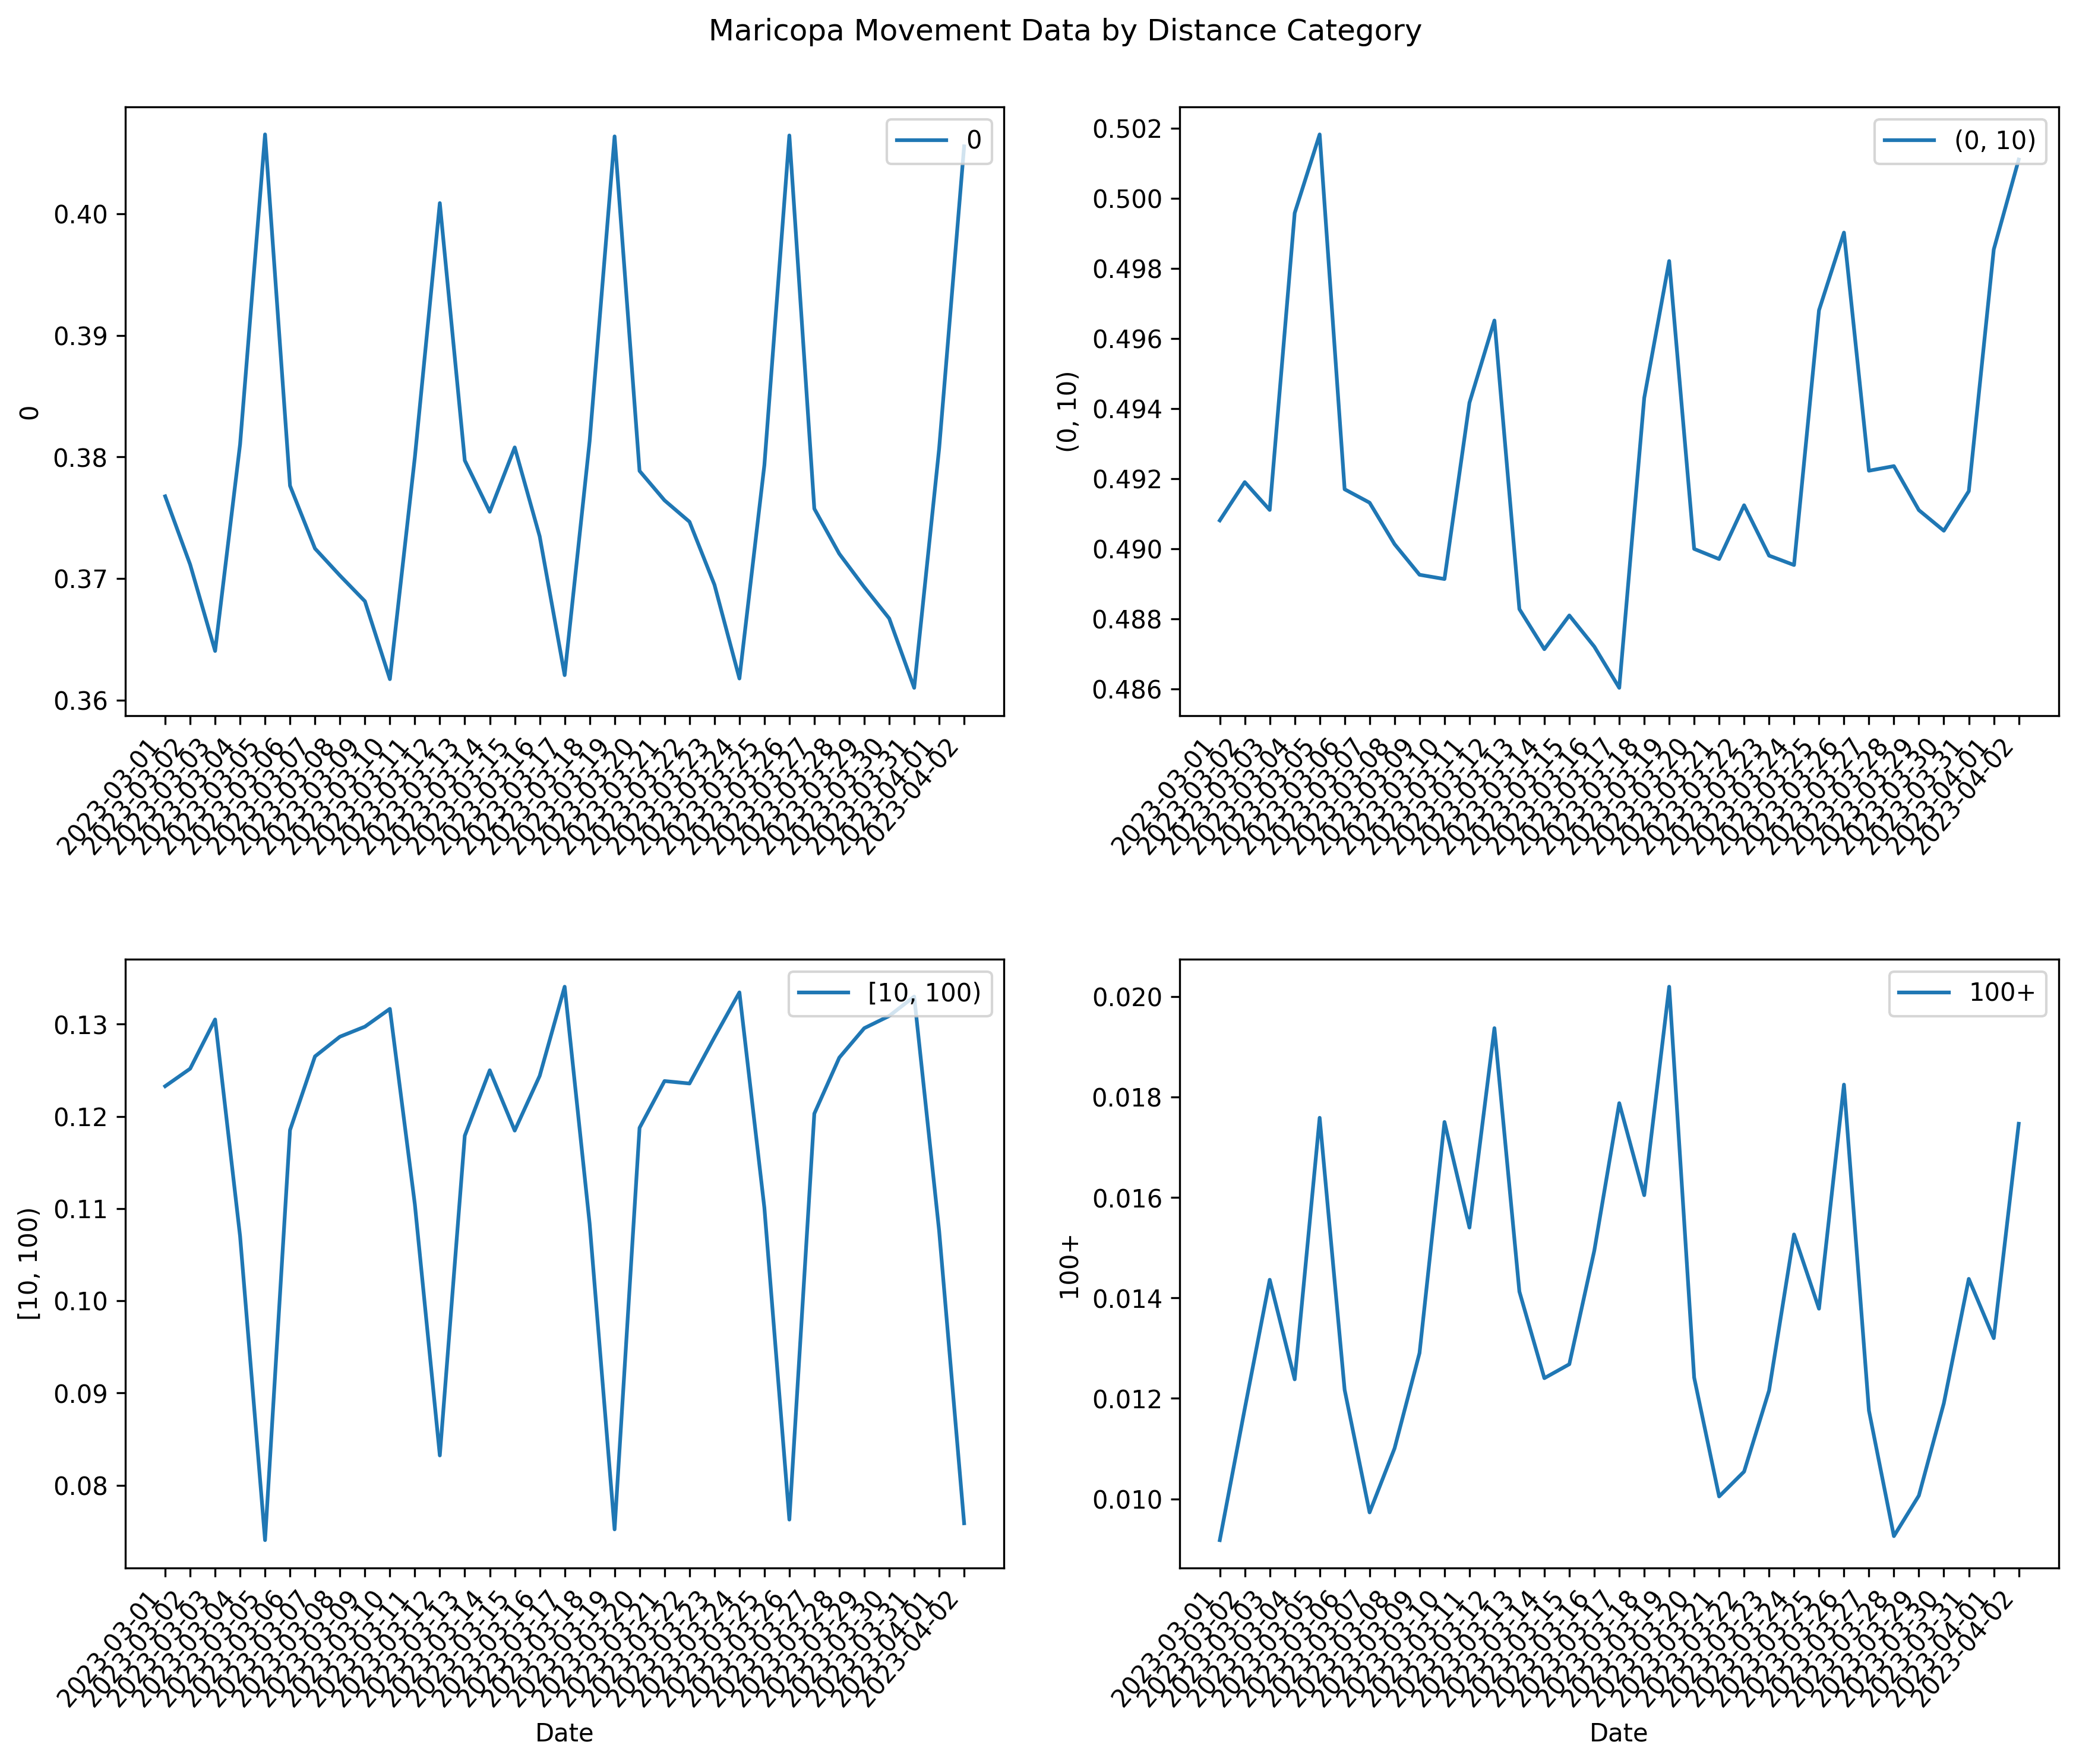

In [53]:
fig = plt.figure(figsize=(14, 10), dpi = 300)
gs = gridspec.GridSpec(2, 2, figure=fig, wspace=0.2, hspace=0.4)

x = pivot_data['ds']

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(x, pivot_data[required_categories[0]], label=required_categories[0])
ax1.set_ylabel(required_categories[0])
ax1.legend(loc='upper right')

ax2 = fig.add_subplot(gs[0, 1], sharex=ax1)
ax2.plot(x, pivot_data[required_categories[1]], label=required_categories[1])
ax2.set_ylabel(required_categories[1])
ax2.legend(loc='upper right')

ax3 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax3.plot(x, pivot_data[required_categories[2]], label=required_categories[2])
ax3.set_ylabel(required_categories[2])
ax3.legend(loc='upper right')
ax3.set_xlabel('Date')

ax4 = fig.add_subplot(gs[1, 1], sharex=ax1)
ax4.plot(x, pivot_data[required_categories[3]], label=required_categories[3])
ax4.set_ylabel(required_categories[3])
ax4.legend(loc='upper right')
ax4.set_xlabel('Date')

for ax in [ax1, ax2, ax3, ax4]:
    plt.setp(ax.get_xticklabels(), rotation=50, ha='right')

fig.suptitle(f'{County} Movement Data by Distance Category')

plt.subplots_adjust(top=0.93)

plt.savefig(os.path.join(dir, f'{County}_{start_date}_{end_date}_movement_data_plot.png'))

plt.show()

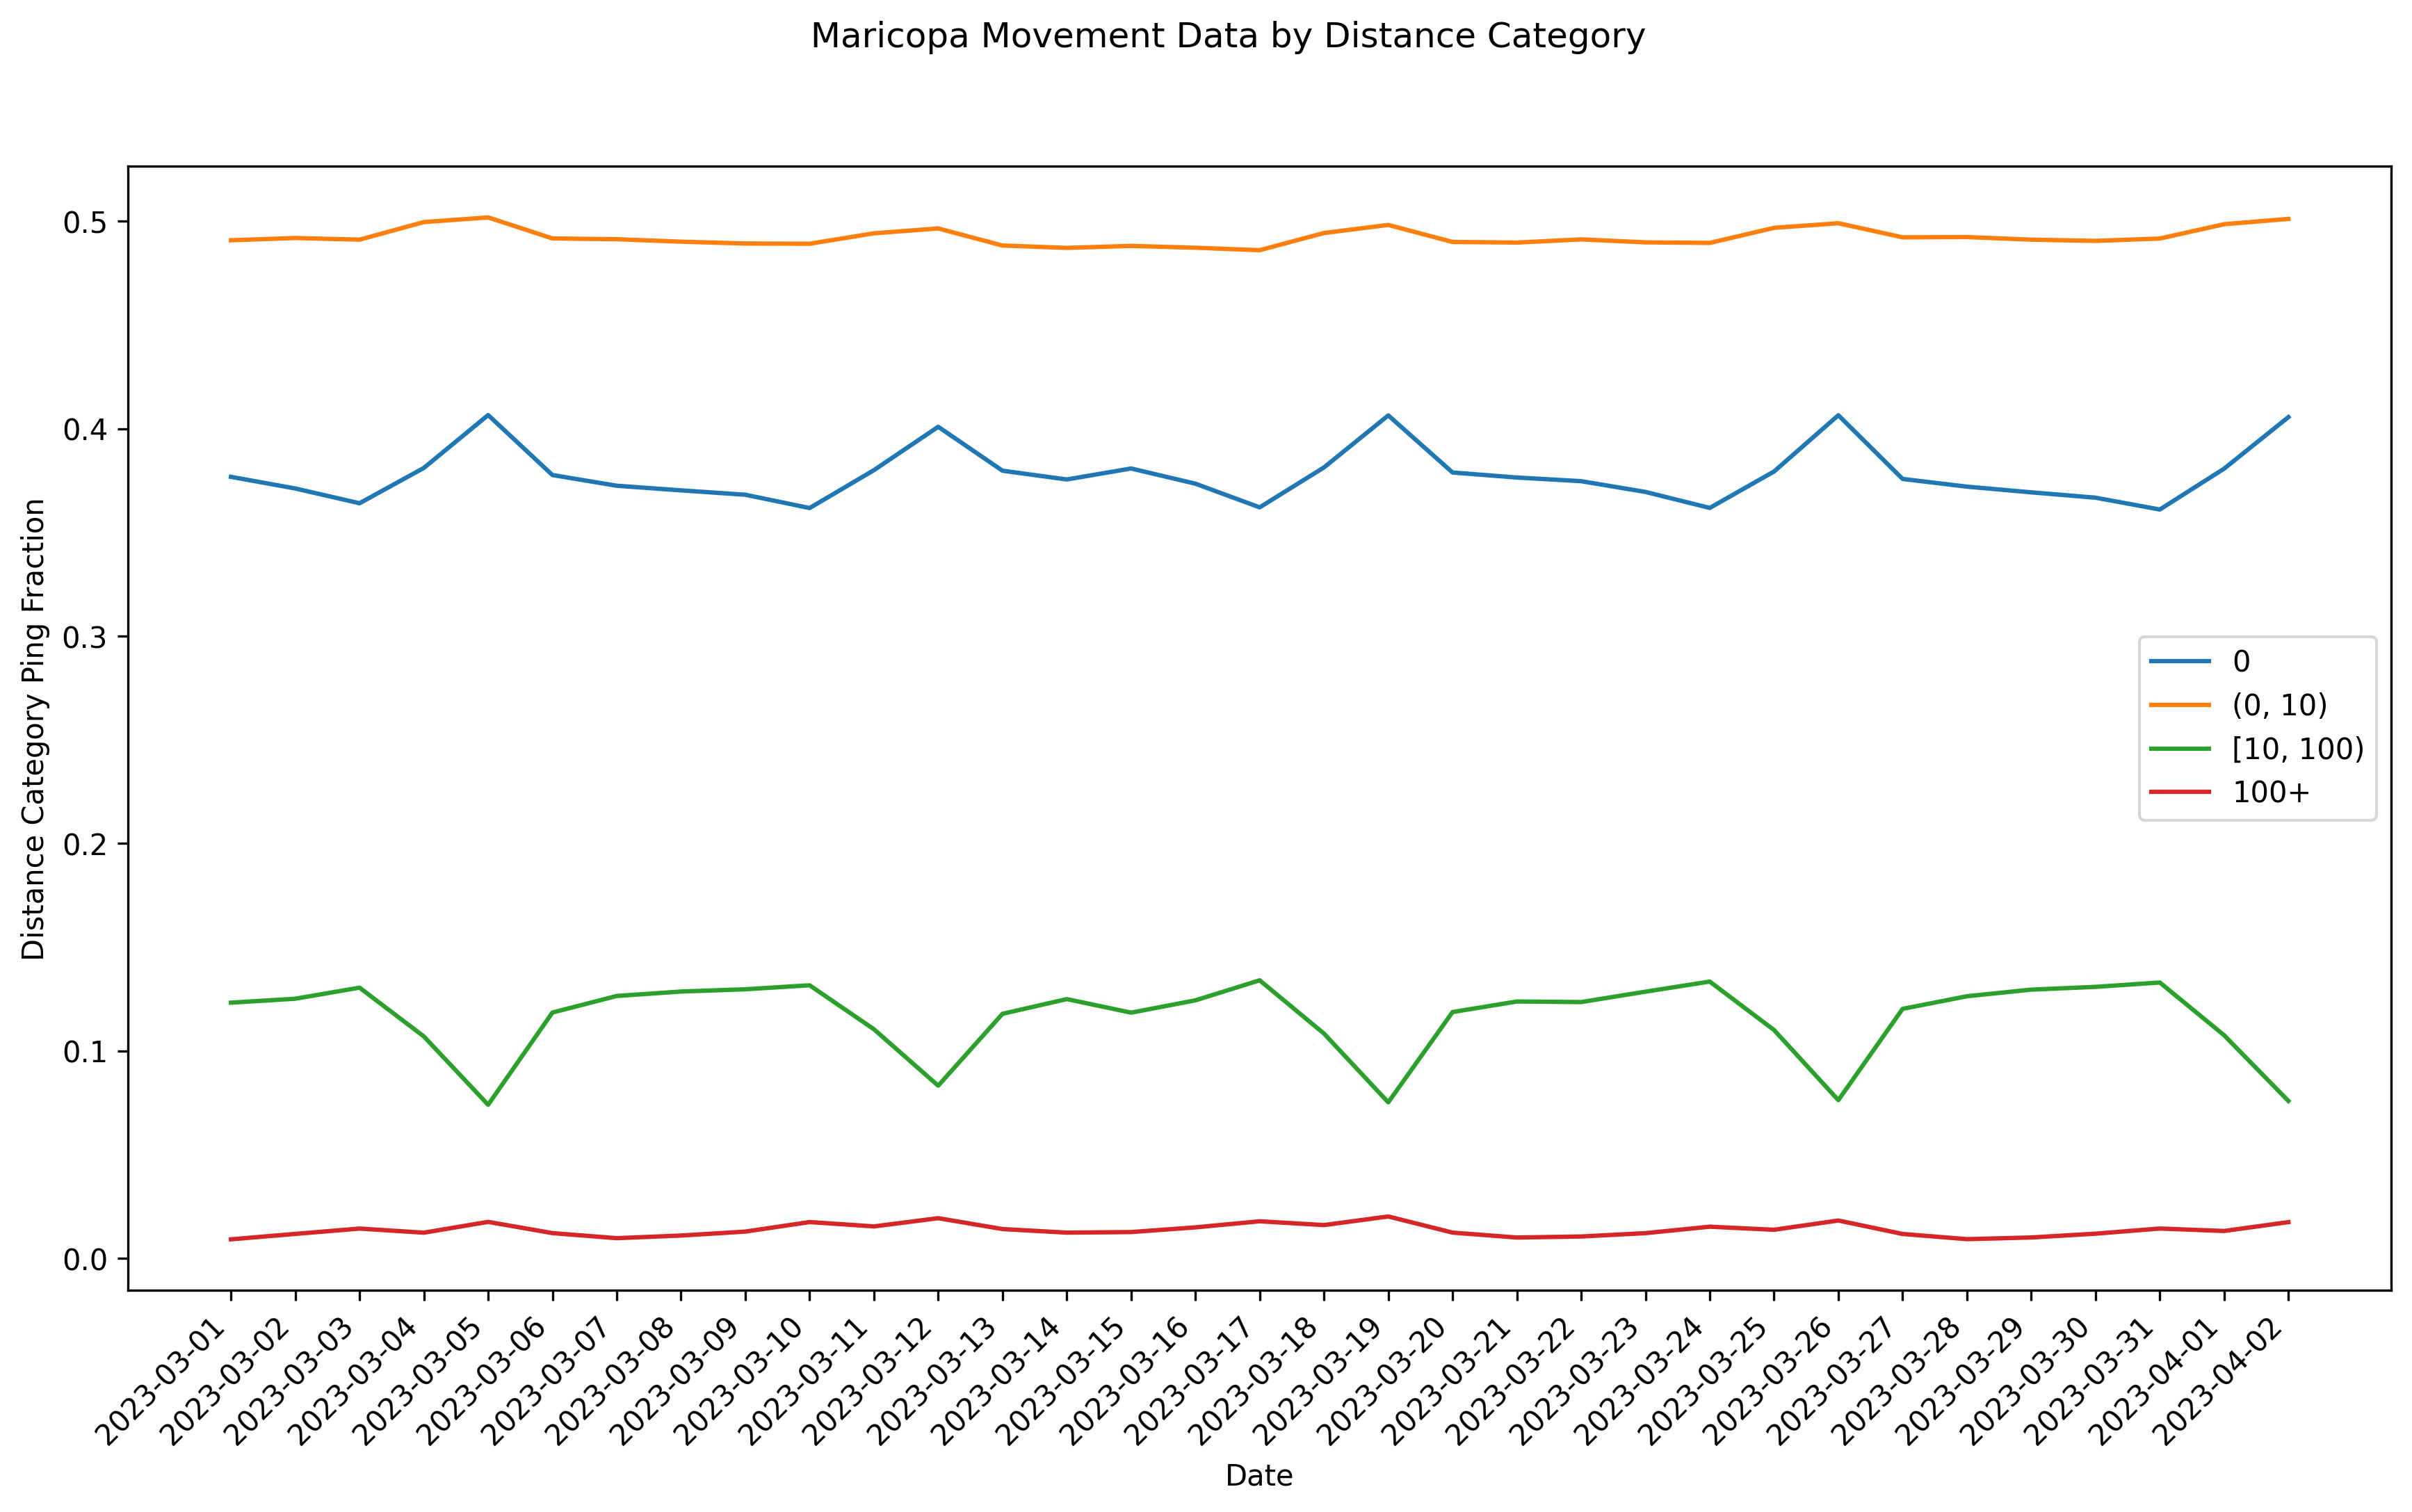

In [54]:
fig, ax = plt.subplots(figsize=(14, 7), dpi = 300)

for category in required_categories:
    ax.plot(x, pivot_data[category], label=category)

ax.set_xlabel('Date')
ax.set_ylabel('Distance Category Ping Fraction')
ax.legend(loc='best')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
fig.suptitle(f'{County} Movement Data by Distance Category')

plt.savefig(os.path.join(dir, f'{County}_{start_date}_{end_date}_movement_data.png'))

plt.show()